In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


In [2]:
prices_df = pd.read_csv('../data/original/price_data.csv')
m_features = pd.read_csv('../data/processed/m_features.csv')
m_potato = pd.read_csv('../data/processed/m_potato_features.csv')


In [3]:
potato_prices = prices_df[prices_df['Commodity'] == 'Potato Red'].copy()
potato_prices.drop(columns=['Commodity', 'SN', 'Unit', 'Minimum', 'Maximum'], inplace=True)
potato_prices.rename(columns={'Date':'date'}, inplace=True)

potato_prices['date'] = pd.to_datetime(potato_prices['date'])
potato_prices.set_index('date', inplace=True)

potato_prices

,Average
date,
2013-06-16,20.5
2013-06-17,20.5
2013-06-18,19.5
2013-06-19,20.5
2013-06-20,20.5
...,...
2021-05-09,36.5
2021-05-10,36.5
2021-05-11,36.5


In [4]:
m_prices = potato_prices[['Average']].resample('MS').mean()
m_prices

,Average
date,
2013-06-01,21.772727
2013-07-01,23.480000
2013-08-01,28.142857
2013-09-01,30.360000
2013-10-01,36.777778
...,...
2021-01-01,34.435484
2021-02-01,26.839286
2021-03-01,27.783333


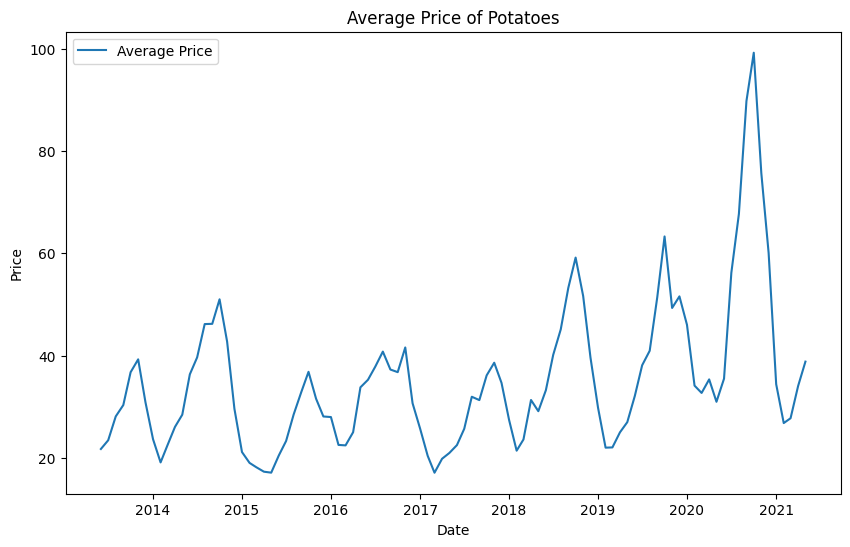

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(m_prices['Average'], label='Average Price')
plt.title('Average Price of Potatoes')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

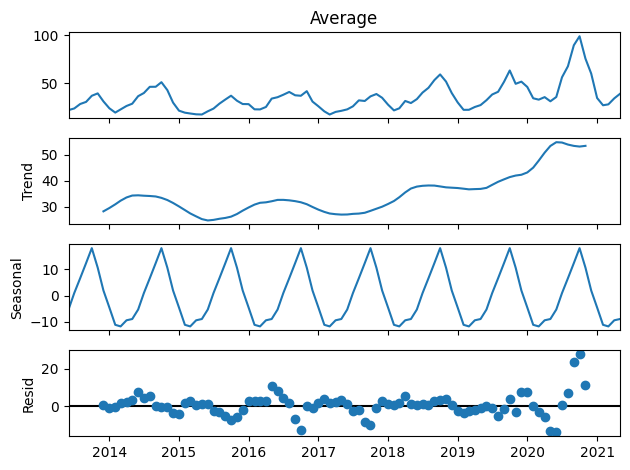

In [6]:
decomposed = seasonal_decompose(m_prices['Average'], model='additive', period=12)
fig = decomposed.plot()
plt.show()

In [7]:
# Time-based features
m_prices['Month'] = m_prices.index.month
m_prices['Year'] = m_prices.index.year
m_prices['Quarter'] = m_prices.index.quarter

# set the last 12 row values for average to NaN
y_test = m_prices['Average'][-12:].copy()
# set the last 12 row values for average to NaN

m_prices['Average'][-12:] = None


'''
# lag features for 12 months
for i in range(1, 13):
    m_prices[f'lag_{i}'] = m_prices['Average'].shift(i)


# Rolling Window Statistics
m_prices["rolling_mean_3_months"] = m_prices['Average'].rolling(window=3).mean()
m_prices["rolling_mean_6_months"] = m_prices['Average'].rolling(window=6).mean()
m_prices["rolling_mean_9_months"] = m_prices['Average'].rolling(window=9).mean()
m_prices["rolling_mean_12_months"] = m_prices['Average'].rolling(window=12).mean()
'''

m_prices.tail(15)

C:\Users\lukas\AppData\Local\Temp\ipykernel_4592\3156146597.py:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  m_prices['Average'][-12:] = None
C:\Users\lukas\AppData\Local\Temp\ipykernel_4592\3156146597.py:10: SettingWithCopyWarning: 
A v

,Average,Month,Year,Quarter
date,,,,
2020-03-01,32.724138,3,2020,1
2020-04-01,35.375000,4,2020,2
2020-05-01,31.000000,5,2020,2
2020-06-01,NaN,6,2020,2
2020-07-01,NaN,7,2020,3
2020-08-01,NaN,8,2020,3
2020-09-01,NaN,9,2020,3
2020-10-01,NaN,10,2020,4
2020-11-01,NaN,11,2020,4


In [8]:
y_test

date
2020-06-01    35.516667
2020-07-01    56.200000
2020-08-01    67.709677
2020-09-01    89.766667
2020-10-01    99.206897
2020-11-01    75.683333
2020-12-01    60.080645
2021-01-01    34.435484
2021-02-01    26.839286
2021-03-01    27.783333
2021-04-01    34.083333
2021-05-01    38.846154
Freq: MS, Name: Average, dtype: float64

In [25]:
def check_missing_values(df):
    if df.isnull().sum().sum() == 0:
        return "No missing values"
    else:
        return df.isnull()
    
check_missing_values(m_prices)

,Average,Month,Year,Quarter
date,,,,
2013-06-01,False,False,False,False
2013-07-01,False,False,False,False
2013-08-01,False,False,False,False
2013-09-01,False,False,False,False
2013-10-01,False,False,False,False
...,...,...,...,...
2021-01-01,True,False,False,False
2021-02-01,True,False,False,False
2021-03-01,True,False,False,False


In [10]:
m_potato['date'] = pd.to_datetime(m_potato['date'])
m_potato.set_index('date', inplace=True)

m_features['date'] = pd.to_datetime(m_features['date'])
m_features.set_index('date', inplace=True)

# m_potato = m_prices.join(m_potato, how='inner')
# m_potato = m_potato.join(m_features, how='inner')

m_potato = m_prices.copy()

# add holdiays feature from m_features
m_potato['holidays'] = m_features['holidays']

In [11]:
if m_potato.isnull().sum().sum() == 0:
    print("No missing values")
else:
    print(m_potato.isnull().sum()) 

Average     12
Month        0
Year         0
Quarter      0
holidays     0
dtype: int64


In [12]:
m_potato = m_potato[12:]
m_potato

,Average,Month,Year,Quarter,holidays
date,,,,,
2014-06-01,36.360000,6,2014,2,1
2014-07-01,39.677419,7,2014,3,1
2014-08-01,46.183333,8,2014,3,4
2014-09-01,46.232143,9,2014,3,5
2014-10-01,51.022727,10,2014,4,7
...,...,...,...,...,...
2021-01-01,NaN,1,2021,1,2
2021-02-01,NaN,2,2021,1,3
2021-03-01,NaN,3,2021,1,3


In [13]:
X = m_potato.drop(columns=['Average'])
y = m_potato['Average']

# Chronological train-test split
split_index = len(X) - 12  # Use 80% for training
X_train = X.iloc[:split_index]
y_train= y.iloc[:split_index]

y_test

date
2020-06-01    35.516667
2020-07-01    56.200000
2020-08-01    67.709677
2020-09-01    89.766667
2020-10-01    99.206897
2020-11-01    75.683333
2020-12-01    60.080645
2021-01-01    34.435484
2021-02-01    26.839286
2021-03-01    27.783333
2021-04-01    34.083333
2021-05-01    38.846154
Freq: MS, Name: Average, dtype: float64

In [14]:
y_train

date
2014-06-01    36.360000
2014-07-01    39.677419
2014-08-01    46.183333
2014-09-01    46.232143
2014-10-01    51.022727
                ...    
2020-01-01    46.037037
2020-02-01    34.155172
2020-03-01    32.724138
2020-04-01    35.375000
2020-05-01    31.000000
Freq: MS, Name: Average, Length: 72, dtype: float64

In [15]:
m_test = m_potato.iloc[split_index:]
m_test.drop(columns=['Average'], inplace=True)

m_test

C:\Users\lukas\AppData\Local\Temp\ipykernel_4592\3311423531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_test.drop(columns=['Average'], inplace=True)


,Month,Year,Quarter,holidays
date,,,,
2020-06-01,6,2020,2,1
2020-07-01,7,2020,3,0
2020-08-01,8,2020,3,4
2020-09-01,9,2020,3,5
2020-10-01,10,2020,4,7
2020-11-01,11,2020,4,5
2020-12-01,12,2020,4,2
2021-01-01,1,2021,1,2
2021-02-01,2,2021,1,3


In [16]:
# Implement XGBoost model
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

X = m_potato.drop(columns=['Average'])
y = m_potato['Average']

# Chronological train-test split
split_index = int(len(X) * 0.8)  # Use 80% for training
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train= y.iloc[:split_index]

# Train XGBoost model
model = XGBRegressor()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(m_test)


print(len(y_pred))
print(len(y_test))



12
12


In [17]:

mse = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mse}')

Mean Absolute Error: 15.891969203177132


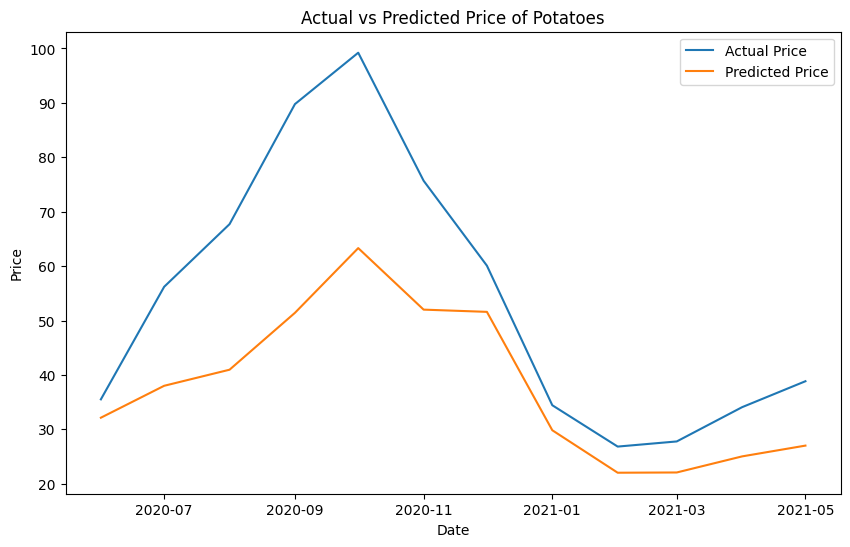

In [18]:
#plot predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Price')
plt.plot(y_test.index, y_pred, label='Predicted Price')
plt.title('Actual vs Predicted Price of Potatoes')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [19]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Scale the features (Lasso requires scaled data for optimal performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(m_test)

# Train Lasso Regression model
lasso = Lasso(alpha=0.1, random_state=42)  # Regularization strength (tune this hyperparameter)
lasso.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = lasso.predict(X_test_scaled)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 16.527502530506393


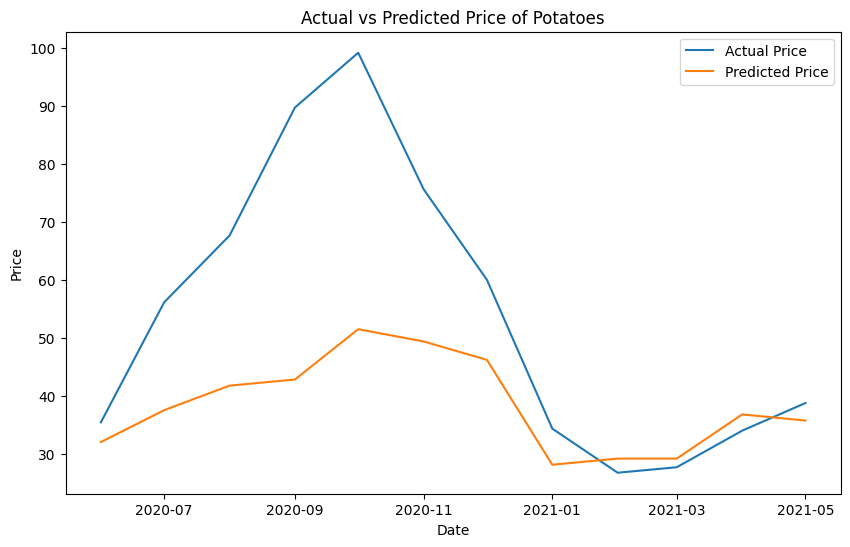

In [20]:
#plot predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Price')
plt.plot(y_test.index, y_pred, label='Predicted Price')
plt.title('Actual vs Predicted Price of Potatoes')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## **3.2 LSTM**

In [21]:
def create_sequences(data, time_steps=1):
    x, y = [], []
    for i in range(len(data) - time_steps):
        x.append(data[i:(i + time_steps), :-1])  # Use all features except the target
        y.append(data[i + time_steps, -1])       # Use the target column as the label
    return np.array(x), np.array(y)

In [22]:
# Define the number of time steps
time_steps = 12